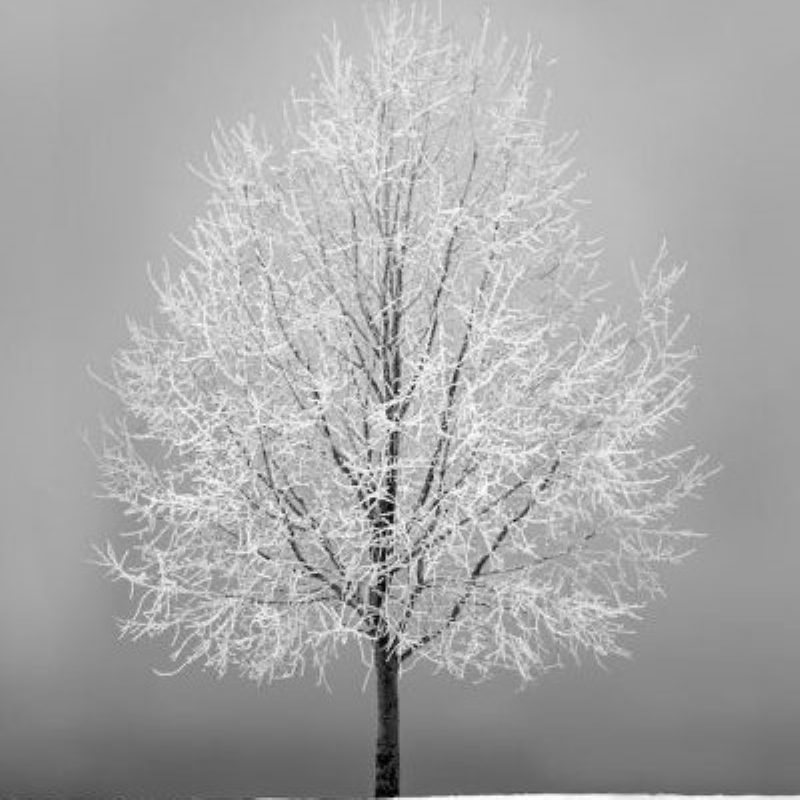

In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

def bl_resize_normalcase(original_img, old_h, old_w, new_h, new_w):
	resized = np.zeros((new_h, new_w))
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			v1 = original_img[x_floor][y_floor]
			v2 = original_img[x_ceil][y_floor]
			v3 = original_img[x_floor][y_ceil]
			v4 = original_img[x_ceil] [y_ceil]

			q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
			q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
			q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j] = q
	return resized.astype(np.uint8)


image = cv2.imread('/content/drive/MyDrive/AI2023/tree.jpg', 0).tolist()


height = len(image)
width = len(image[0])

new_image = bl_resize_special(image, height,width,  height*2, width*2)
cv2_imshow(np.array(new_image))

In [ ]:
def bl_resize_special(original_img, old_h, old_w, new_h, new_w):
	resized = np.zeros((new_h, new_w))
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x)][int(y)]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x)][int(y_floor)]
				q2 = original_img[int(x)][int(y_ceil)]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor)][int(y)]
				q2 = original_img[int(x_ceil)][int(y)]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor][y_floor]
				v2 = original_img[x_ceil][y_floor]
				v3 = original_img[x_floor][y_ceil]
				v4 = original_img[x_ceil] [y_ceil]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j] = q
	return resized.astype(np.uint8)

In [ ]:
def bl_resize_color(original_img, new_h, new_w):
	#get dimensions of original image
	old_h, old_w, c = original_img.shape
	#create an array of the desired shape. 
	#We will fill-in the values later.
	resized = np.zeros((new_h, new_w, c))
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x), int(y), :]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x), int(y_floor), :]
				q2 = original_img[int(x), int(y_ceil), :]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor), int(y), :]
				q2 = original_img[int(x_ceil), int(y), :]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor, :]
				v2 = original_img[x_ceil, y_floor, :]
				v3 = original_img[x_floor, y_ceil, :]
				v4 = original_img[x_ceil, y_ceil, :]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j,:] = q
	return resized.astype(np.uint8)